<a href="https://colab.research.google.com/github/gkarthick510/Project/blob/main/super%20market%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [209]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [210]:
d=pd.read_excel('/content/supermarket_sales - Sheet1.xlsx')

In [211]:
d.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [212]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [213]:
d['Rating'].value_counts()

6.0     26
6.6     24
4.2     22
9.5     22
6.5     21
        ..
4.0     11
5.3     11
8.3     11
4.6      8
10.0     5
Name: Rating, Length: 61, dtype: int64

In [214]:
d['Quantity'].value_counts()

10    119
1     112
4     109
7     102
5     102
6      98
9      92
2      91
3      90
8      85
Name: Quantity, dtype: int64

In [215]:
d['gross margin percentage'].value_counts()

4.761905    1000
Name: gross margin percentage, dtype: int64

In [216]:
d['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [217]:
d['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [218]:
d['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [219]:
d['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [220]:
d['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [221]:
d['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [222]:
d['day'] = (d['Date']).dt.day
d['month'] = (d['Date']).dt.month
d['year'] = (d['Date']).dt.year
del(d["Date"])

In [223]:
d['month'].value_counts()

1    352
3    345
2    303
Name: month, dtype: int64

In [224]:
d.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019


In [225]:
d['Total'].groupby(d["Gender"]).sum()

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64

In [226]:
d['gross income'].groupby(d['day']).sum().reset_index(name='count').T

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
day,1.0000,2.0000,3.0000,4.0000,5.0000,6.000,7.000,8.000,9.000,10.0000,...,22.000,23.0000,24.000,25.0000,26.00,27.000,28.0000,29.0000,30.0000,31.0000
count,467.8135,602.2265,590.4395,378.9345,609.4615,457.725,547.653,643.037,655.585,469.7715,...,348.868,591.8485,552.475,560.9795,420.39,638.008,444.1015,359.0385,335.4915,249.1665


**DATA VISUALIZATION**

Text(0.5, 1.0, 'Gender Count')

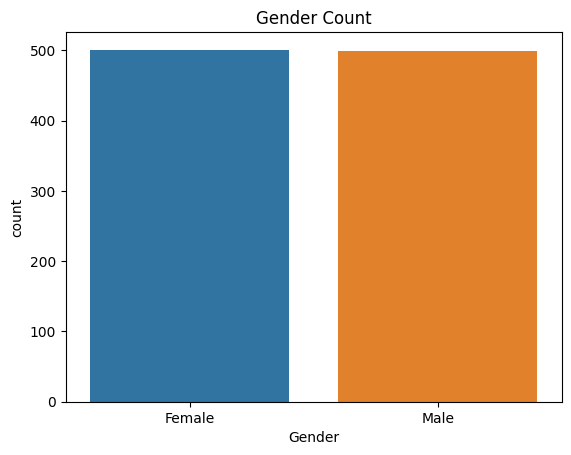

In [227]:
sns.countplot(x=d['Gender'],order=d['Gender'].value_counts().index).set_title('Gender Count')

Text(0.5, 1.0, 'Gender vice Payment Transaction')

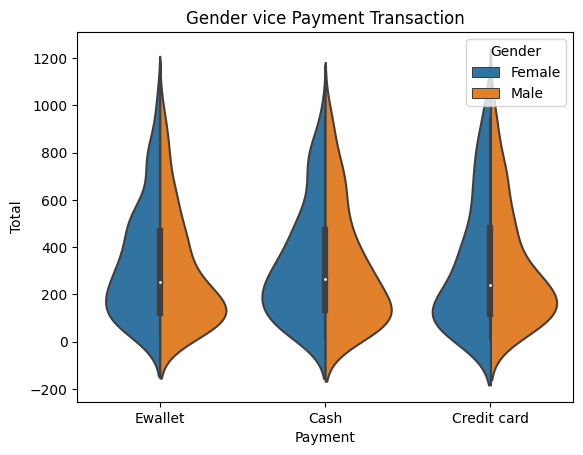

In [229]:
sns.violinplot(data=d,x='Payment',y='Total',hue='Gender',split=True).set_title("Gender vice Payment Transaction")

Females most transaction  is cash
males  most transaction is Ewallet

Gender--------Payment    
Female  
        
        Cash           178  --- (leading count)
        Credit card    163
        Ewallet        160
        
Male   
        
         Ewallet        185--- (leading count)
         Cash           166
         Credit card    148

---





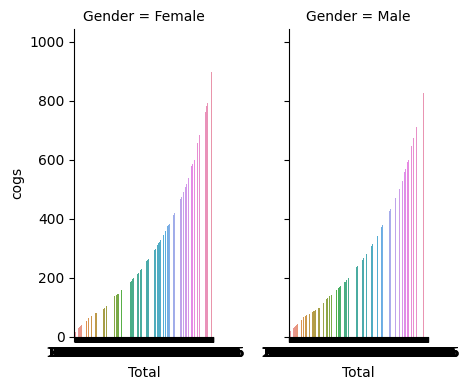

In [230]:
sns.catplot(
    data=d, y="cogs", x="Total", col="Gender",
    kind="bar", height=4, aspect=.6,
)

Text(0.5, 1.0, 'Customer Type by Branch')

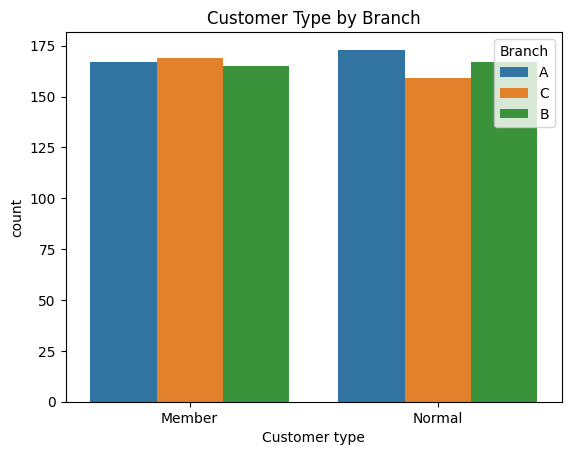

In [231]:
sns.countplot(x="Customer type", hue = "Branch", data =d).set_title("Customer Type by Branch")

In [257]:
d['Rating'].groupby(d['Customer type']).value_counts()

Customer type  Rating
Member         6.6       14
               9.5       14
               5.0       13
               7.0       13
               6.0       12
                         ..
Normal         8.1        5
               4.0        4
               4.7        4
               10.0       3
               4.6        2
Name: Rating, Length: 122, dtype: int64

In [258]:
d['City'].groupby(d['Customer type']).value_counts()

Customer type  City     
Member         Naypyitaw    169
               Yangon       167
               Mandalay     165
Normal         Yangon       173
               Mandalay     167
               Naypyitaw    159
Name: City, dtype: int64

Text(0.5, 1.0, 'Customer Type')

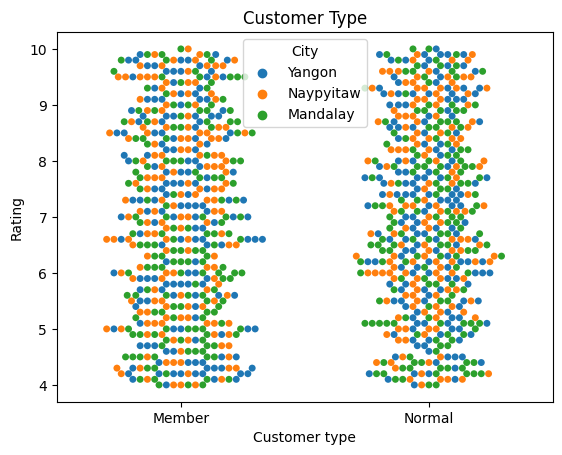

In [232]:
sns.swarmplot(x="Customer type",  y = "Rating",  hue = "City", data =d).set_title("Customer Type") 

<Axes: xlabel='count', ylabel='Product line'>

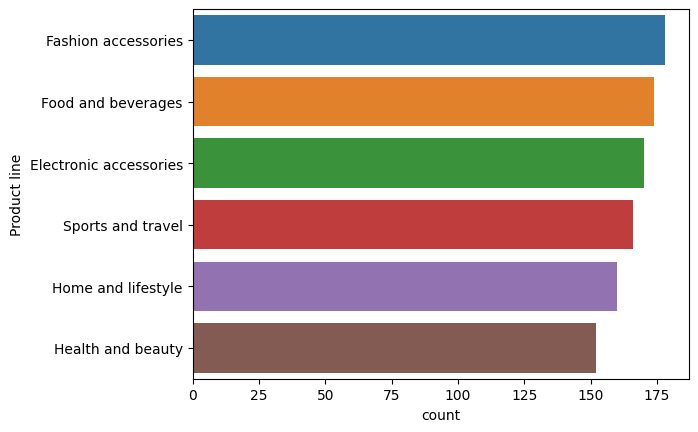

In [233]:
sns.countplot(y = 'Product line', data=d, order = d['Product line'].value_counts().index )

Text(0.5, 1.0, 'Payment Mode')

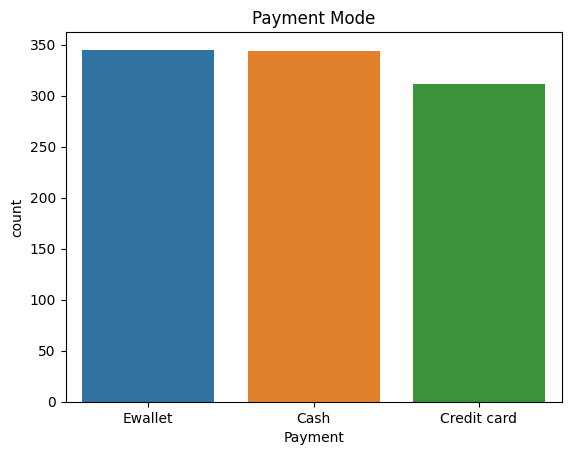

In [234]:
sns.countplot(x="Payment", data =d).set_title("Payment Mode")

count of credit card transaction is low compare to Ewallet and Cash payment

cash transactrion is high in C Branch and Ewallet is high in Branch A

Text(0.5, 1.0, 'Payment Channel by Branch')

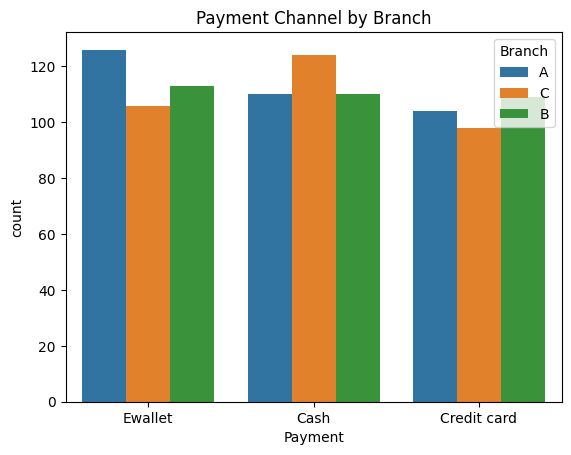

In [235]:
sns.countplot(x="Payment", hue = "Branch", data =d).set_title("Payment Channel by Branch")

Text(0.5, 1.0, 'Ratings by Branch')

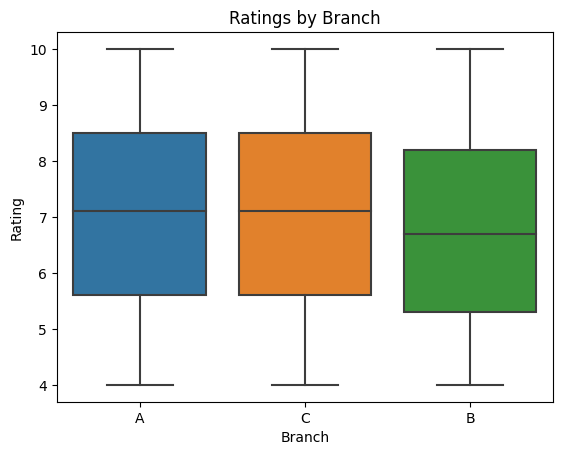

In [236]:
sns.boxplot(x="Branch", y = "Rating" ,data =d).set_title("Ratings by Branch")

<Axes: xlabel='Quantity', ylabel='Product line'>

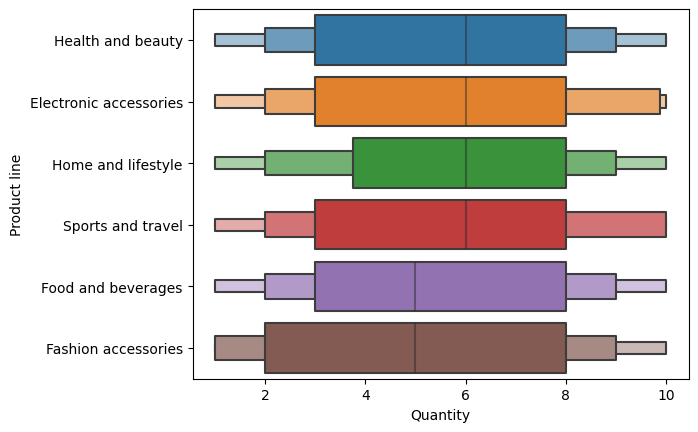

In [237]:
sns.boxenplot(data=d,y='Product line',x='Quantity')

<Axes: xlabel='Rating', ylabel='Product line'>

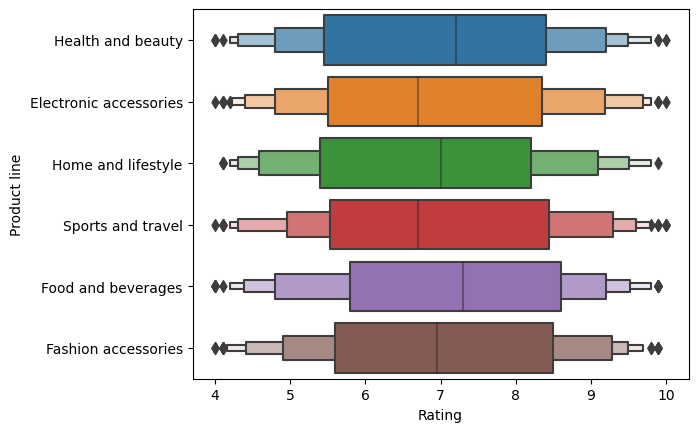

In [239]:
sns.boxenplot(data=d,y='Product line',x='Rating')

<Axes: xlabel='gross income', ylabel='Product line'>

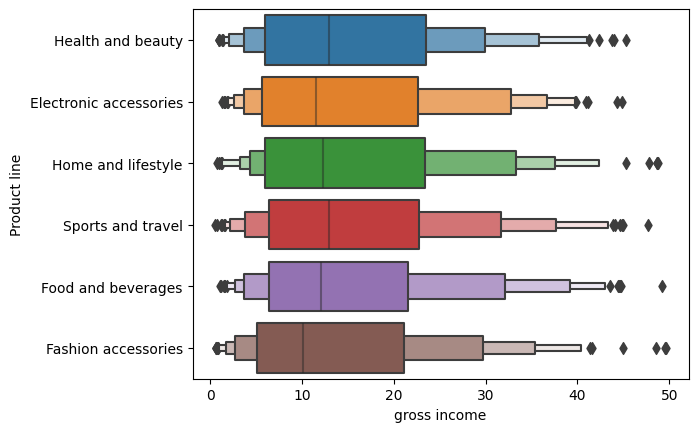

In [238]:
sns.boxenplot(data=d,y='Product line',x='gross income')

compare to A&C branch B branch need to improve customer handling
 
Food and beverages quantity is low compare to other and rating is good --need to increace a quantity 

sports and travels rating is low need to concentrate customersatisfaction

Text(0.5, 1.0, 'Most profittable Branches')

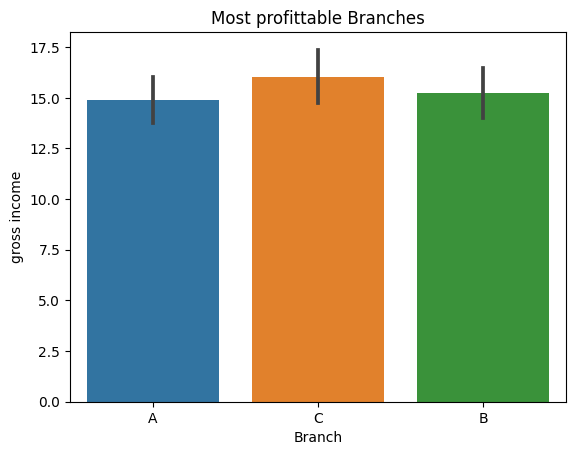

In [240]:
sns.barplot(x=d['Branch'],y=d['gross income'])
plt.title("Most profittable Branches")

Text(0.5, 1.0, 'Most profittable City')

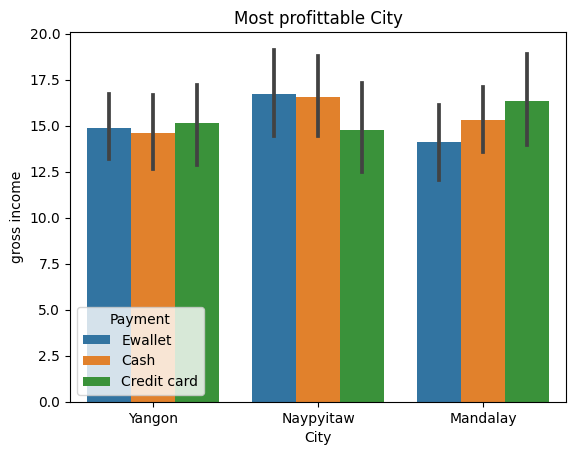

In [263]:
sns.barplot(x=d['City'],y=d['gross income'],hue="Payment",data=d)
plt.title("Most profittable City")

<Axes: xlabel='Total', ylabel='Density'>

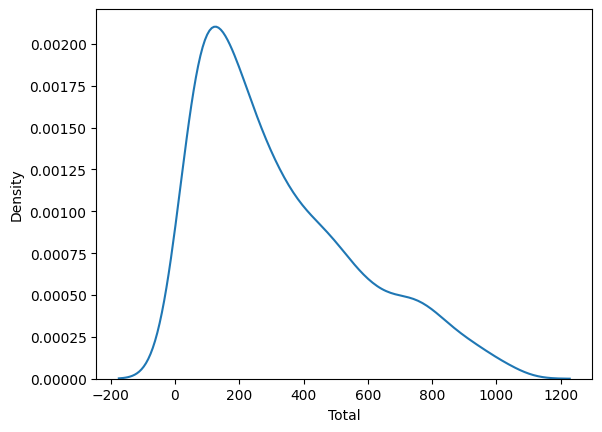

In [242]:
sns.kdeplot(data=d,x='Total')

customers most transaction is near by 200

<Axes: xlabel='Product line', ylabel='Rating'>

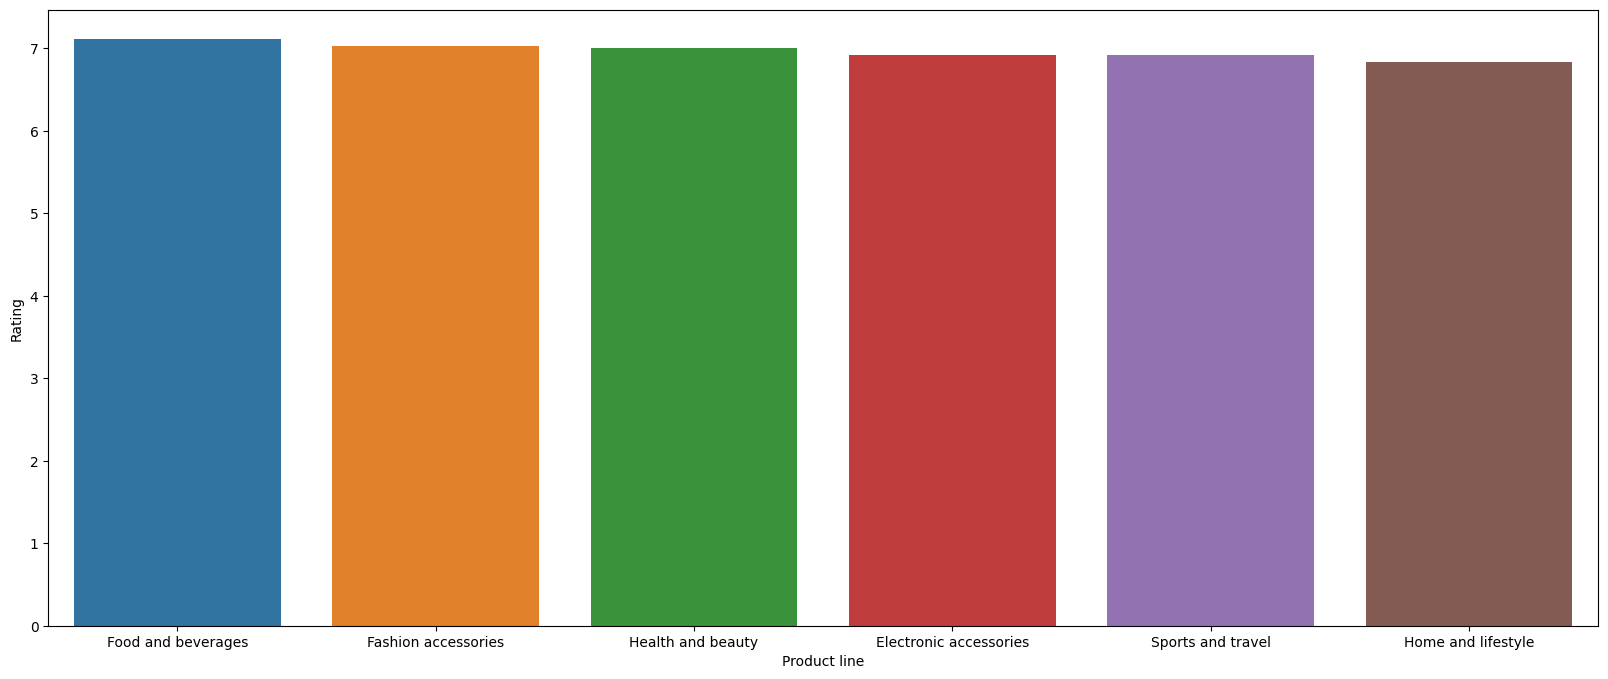

In [243]:
cat=d[["Product line", "Rating"]].groupby(['Product line'], as_index=False).mean().sort_values(by='Rating', ascending=False)
plt.figure(figsize=(20,8))

sns.barplot(x='Product line', y='Rating', data=cat)

<Axes: xlabel='Product line', ylabel='gross income'>

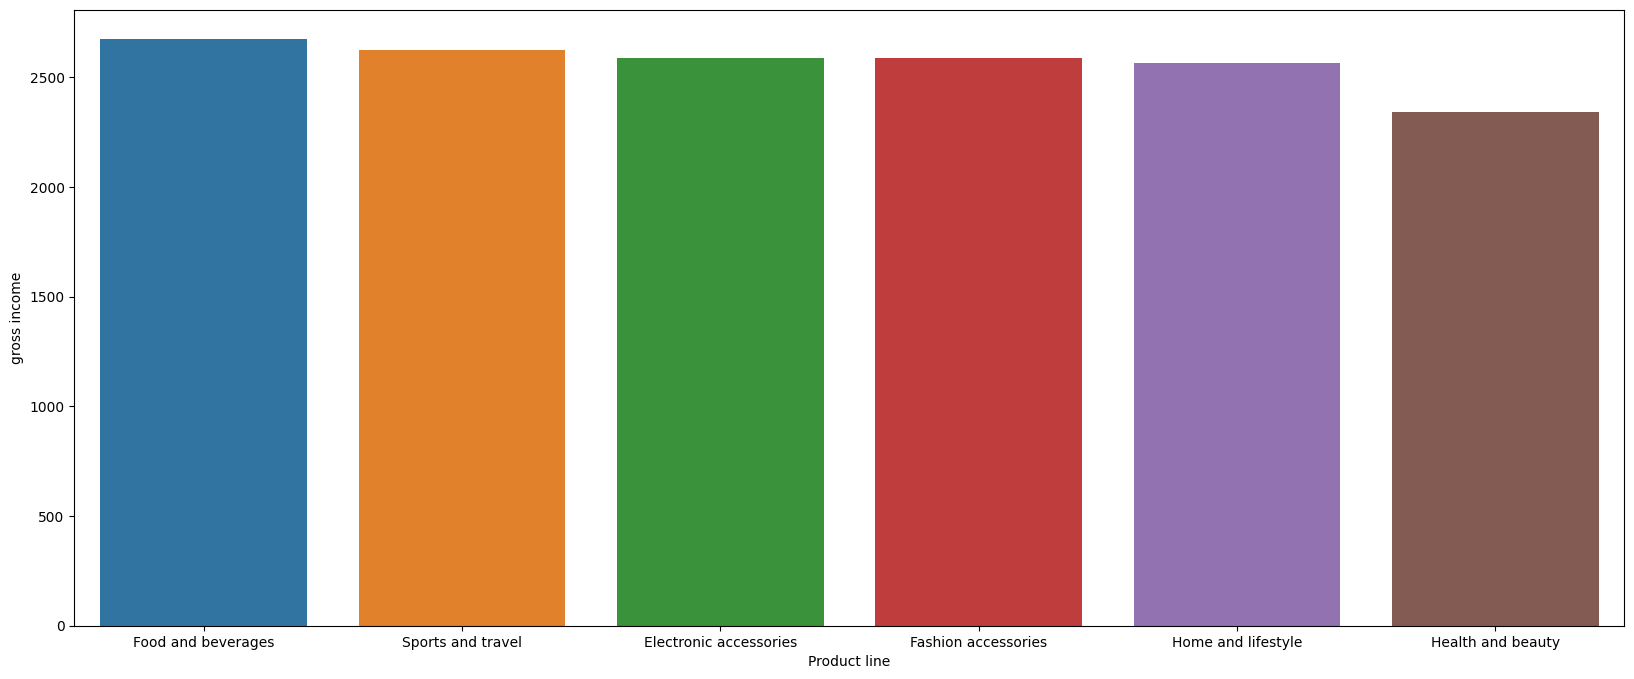

In [244]:
cat=d[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum().sort_values(by='gross income', ascending=False)
plt.figure(figsize=(20,8))

sns.barplot(x='Product line', y='gross income', data=cat)

Text(0.5, 1.0, 'Product Sales per Day')

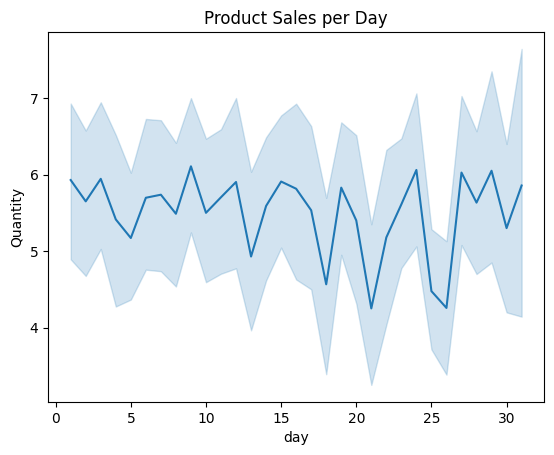

In [264]:
sns.lineplot(x="day",y = 'Quantity',data =d).set_title("Product Sales per Day")

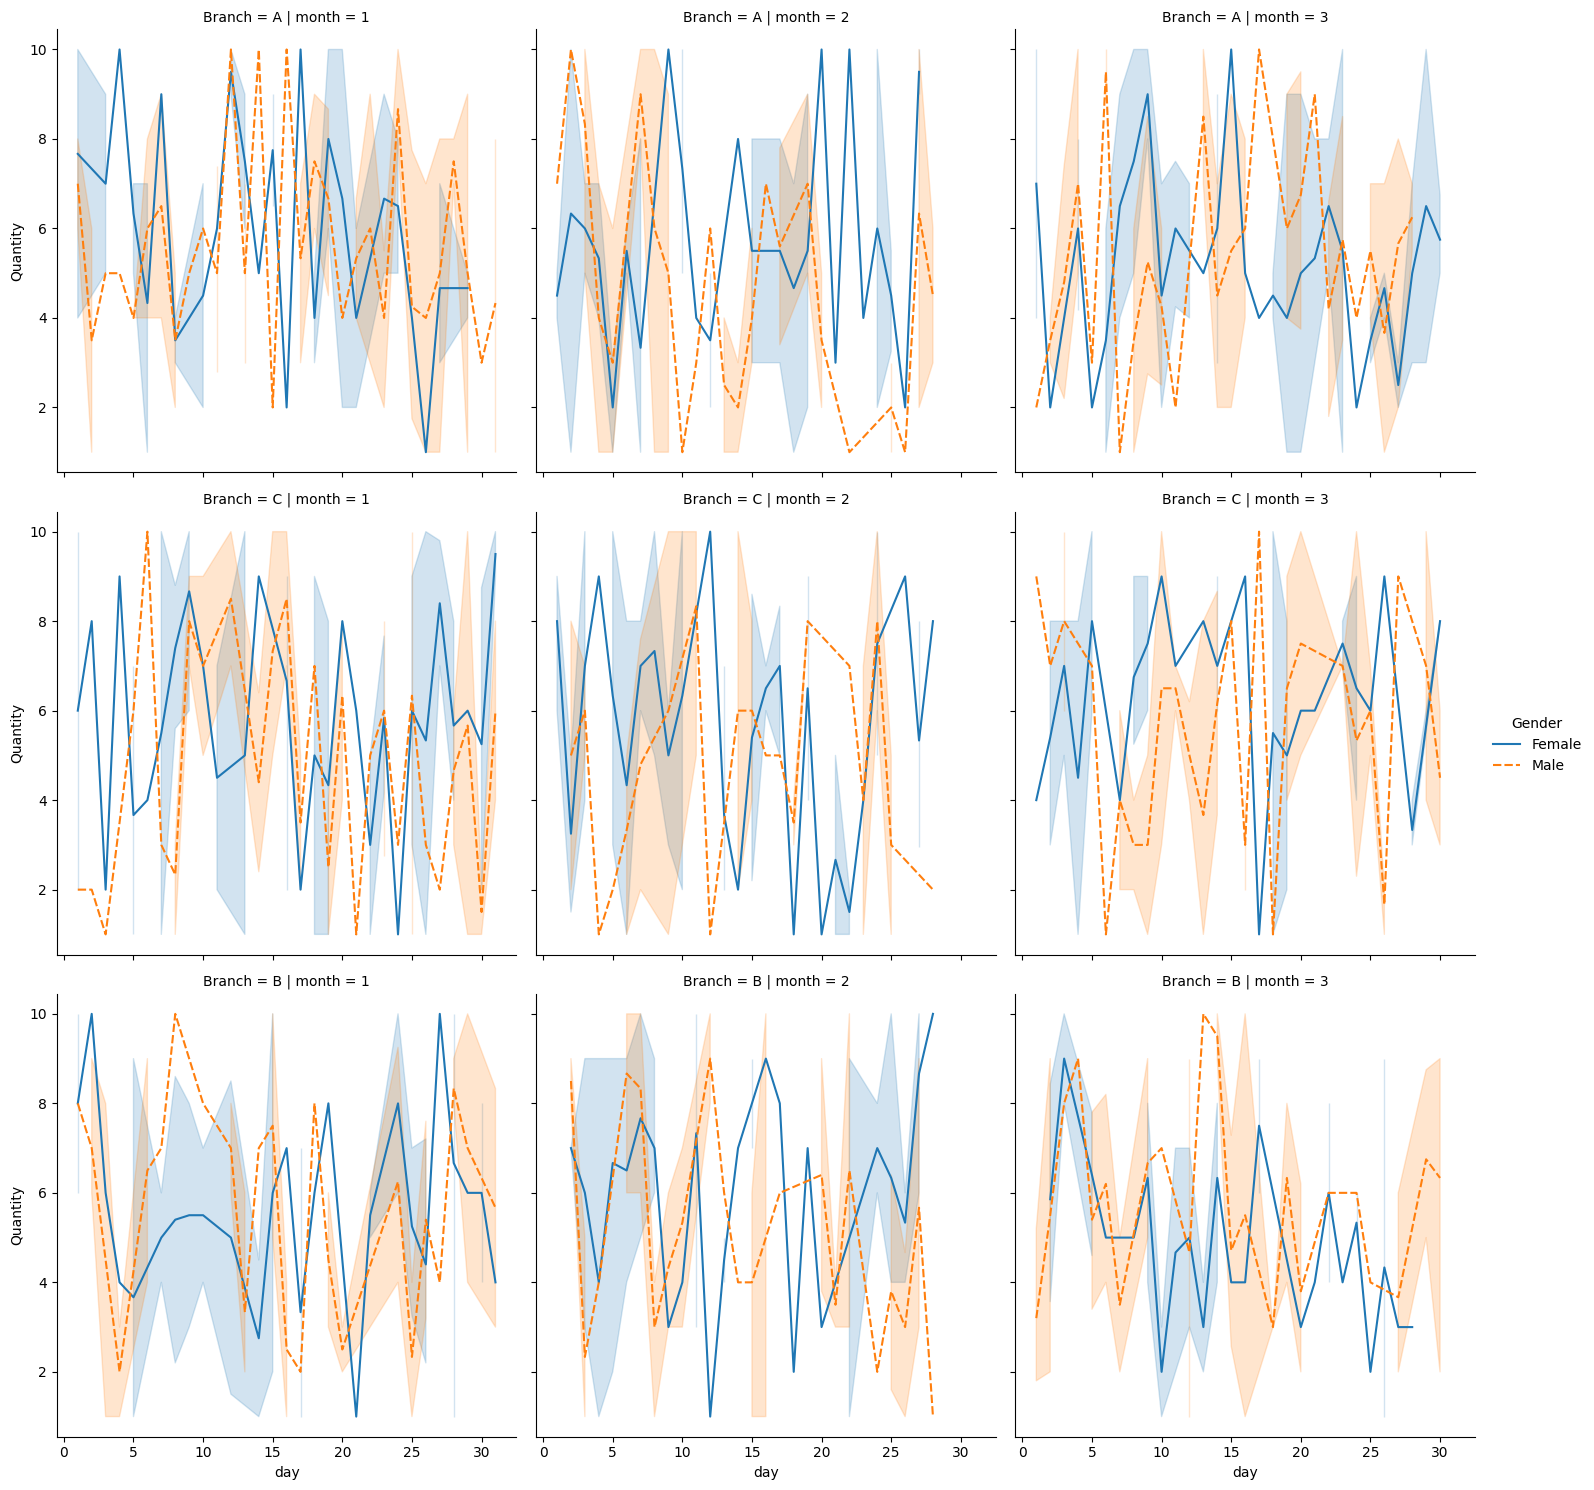

In [246]:
sns.relplot(x="day",  y = 'Quantity', col= 'month' , row= 'Branch', kind="line", hue="Gender", style="Gender", data =d)

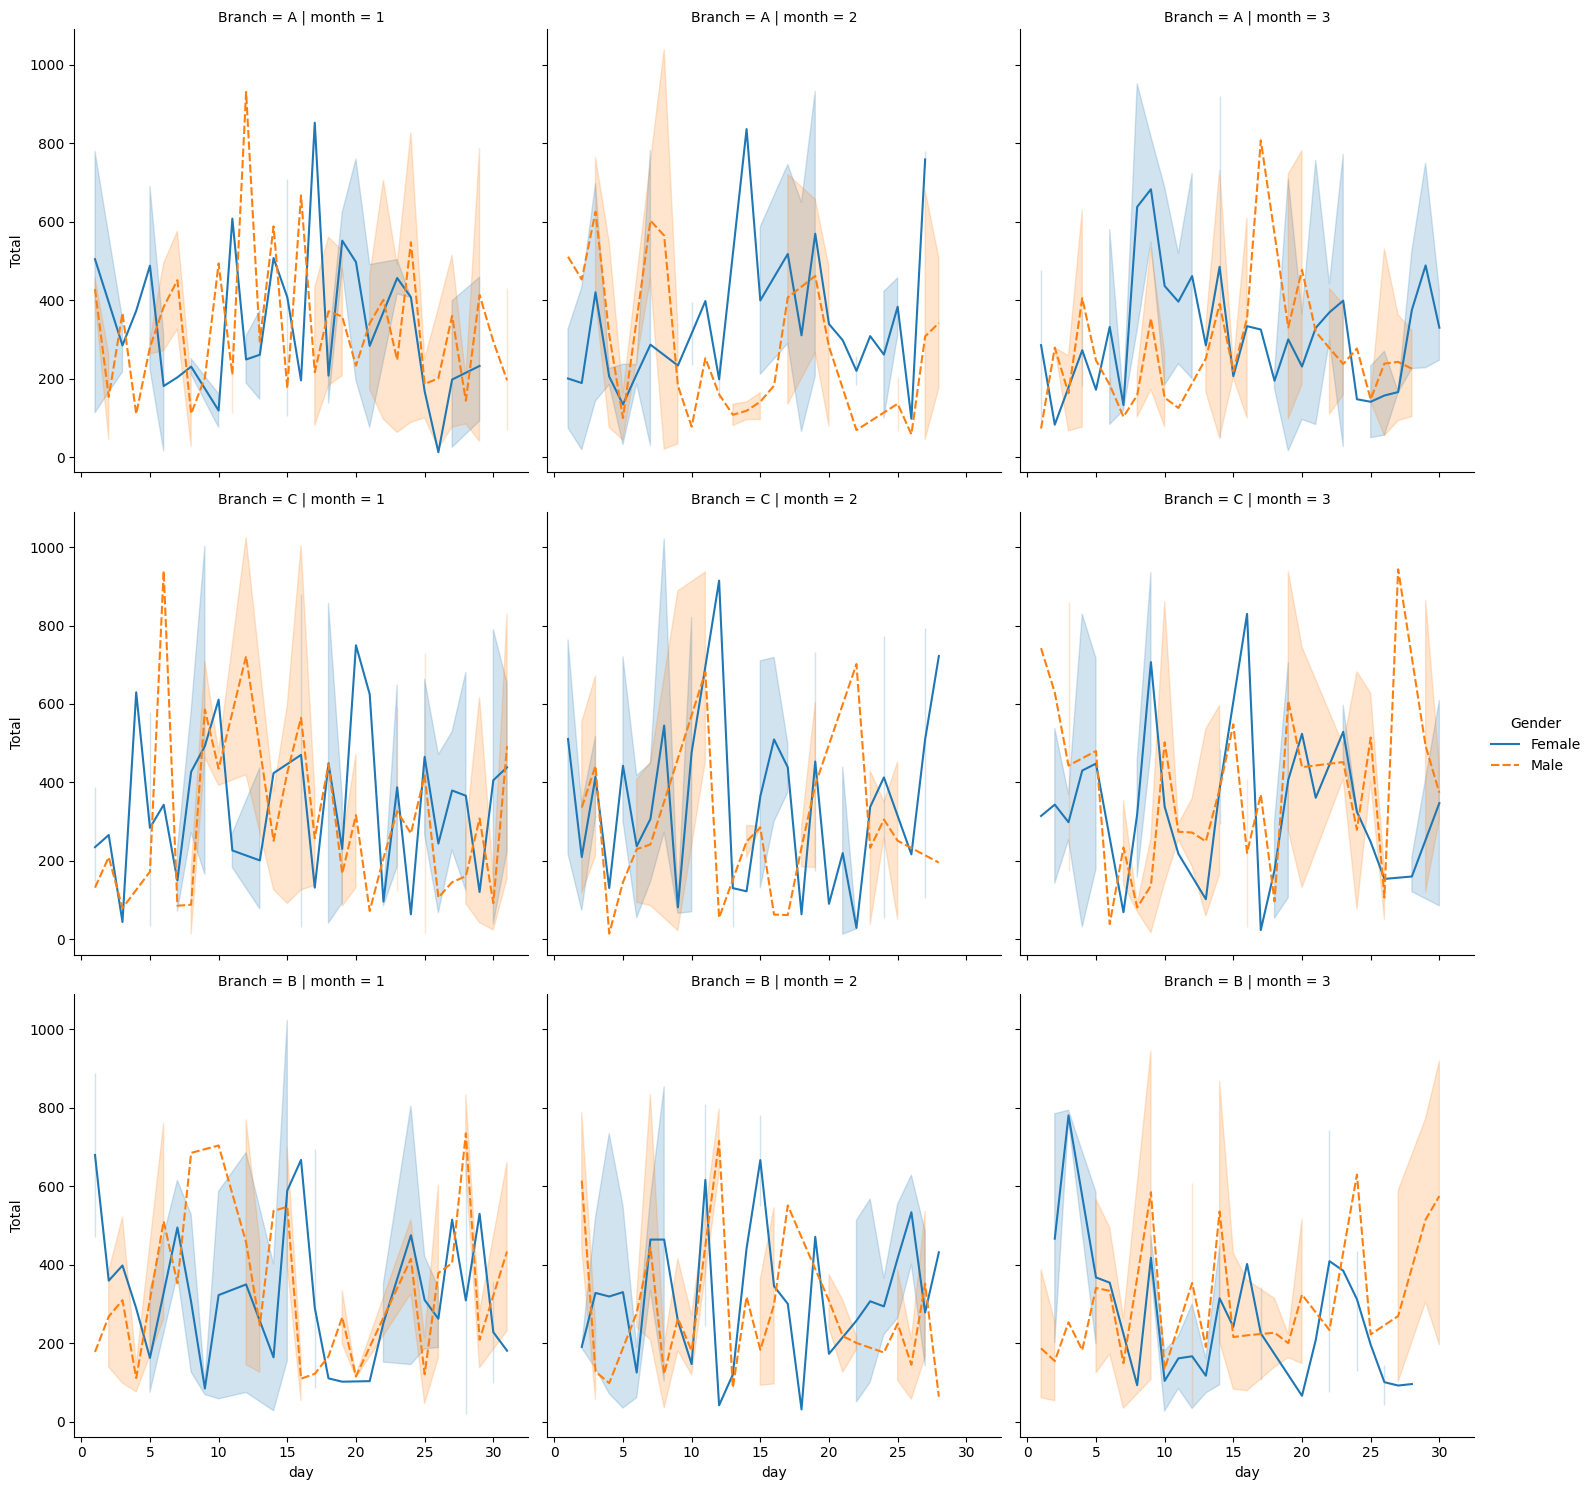

In [247]:
sns.relplot(x="day",  y = 'Total', col= 'month' , row= 'Branch', kind="line", hue="Gender", style="Gender", data =d)

<Axes: xlabel='Unit price', ylabel='gross income'>

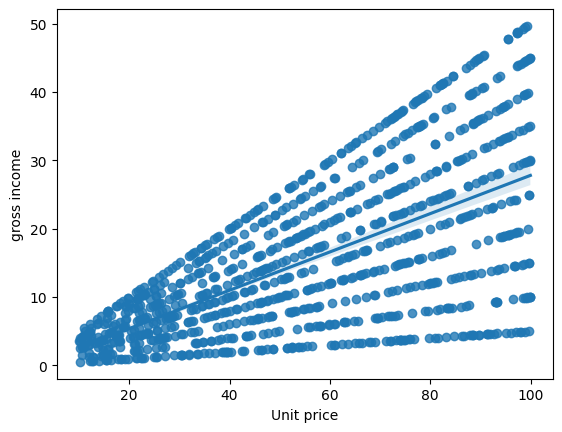

In [248]:
sns.regplot(x='Unit price',y='gross income',data=d)

array([[<Axes: title={'center': 'cogs'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'gross income'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'Rating'}>]], dtype=object)

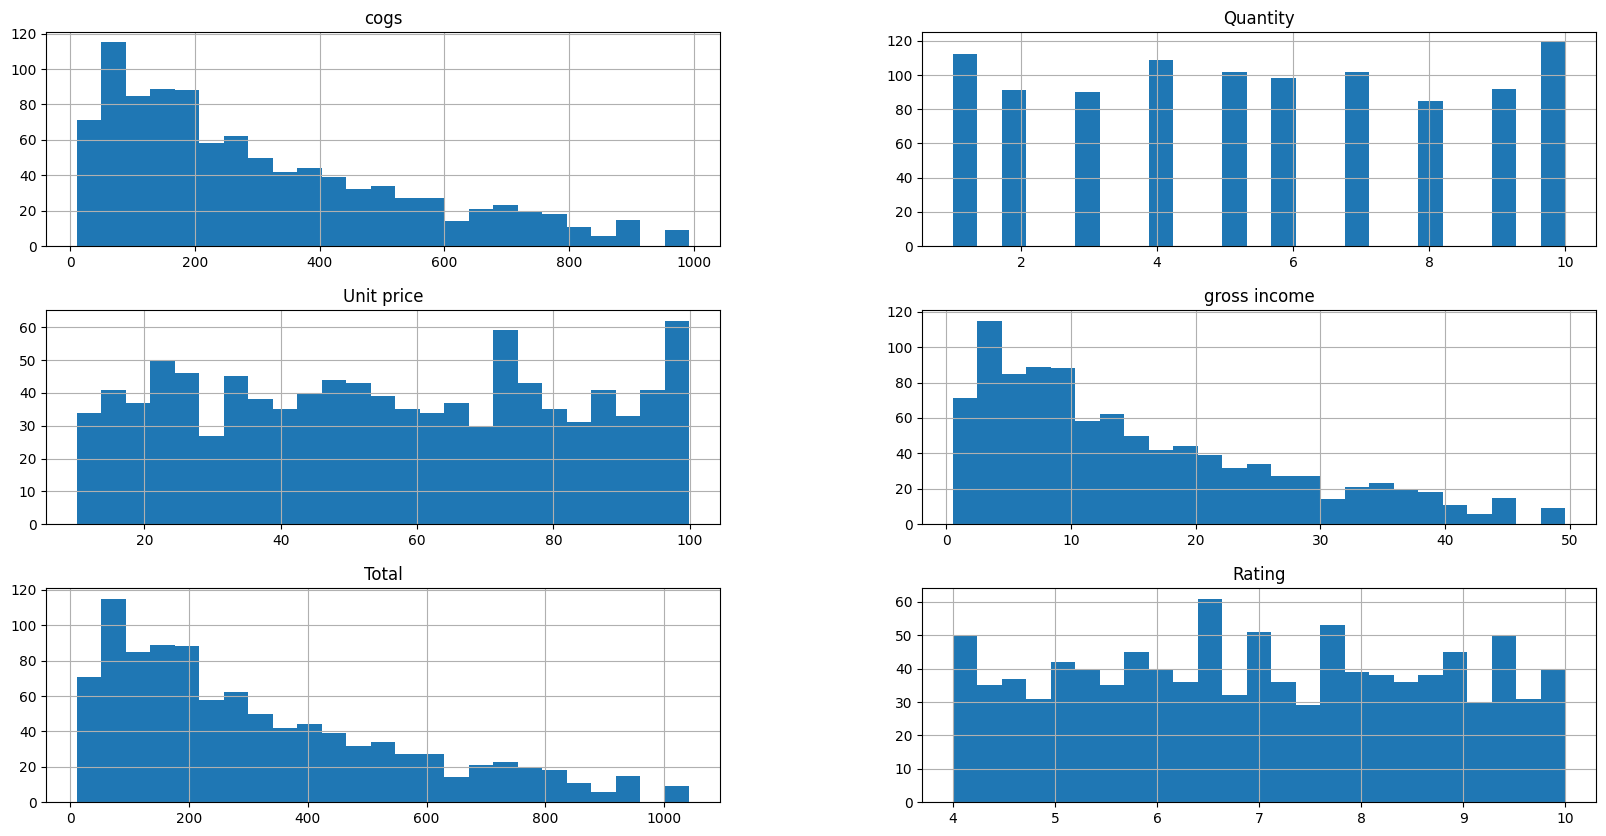

In [249]:
numerical = ['cogs','Quantity','Unit price','gross income','Total','Rating',]

d[numerical].hist(bins=25, figsize=(20,10), layout=(3, 2))

<Axes: >

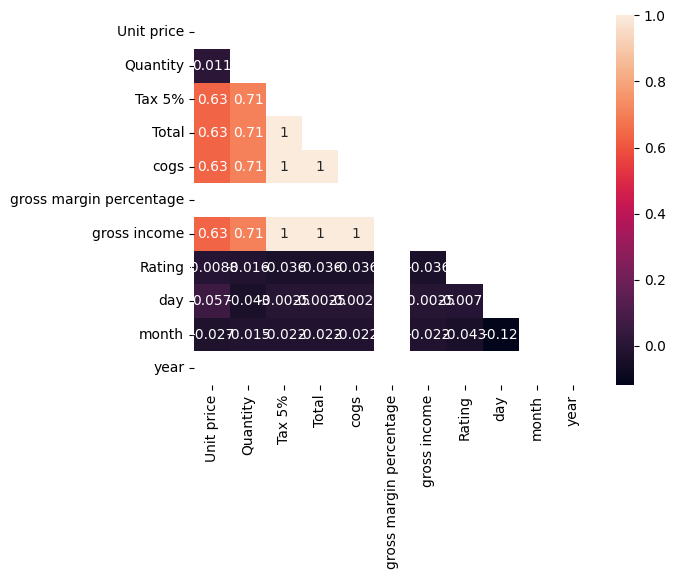

In [250]:
matrix = np.triu(d.corr())
sns.heatmap(d.corr(), annot=True, mask=matrix)

**USING ML ALGORITHM Kmeans Cluster**

In [251]:


X = d.iloc[:, -7].values.reshape(-1,1)

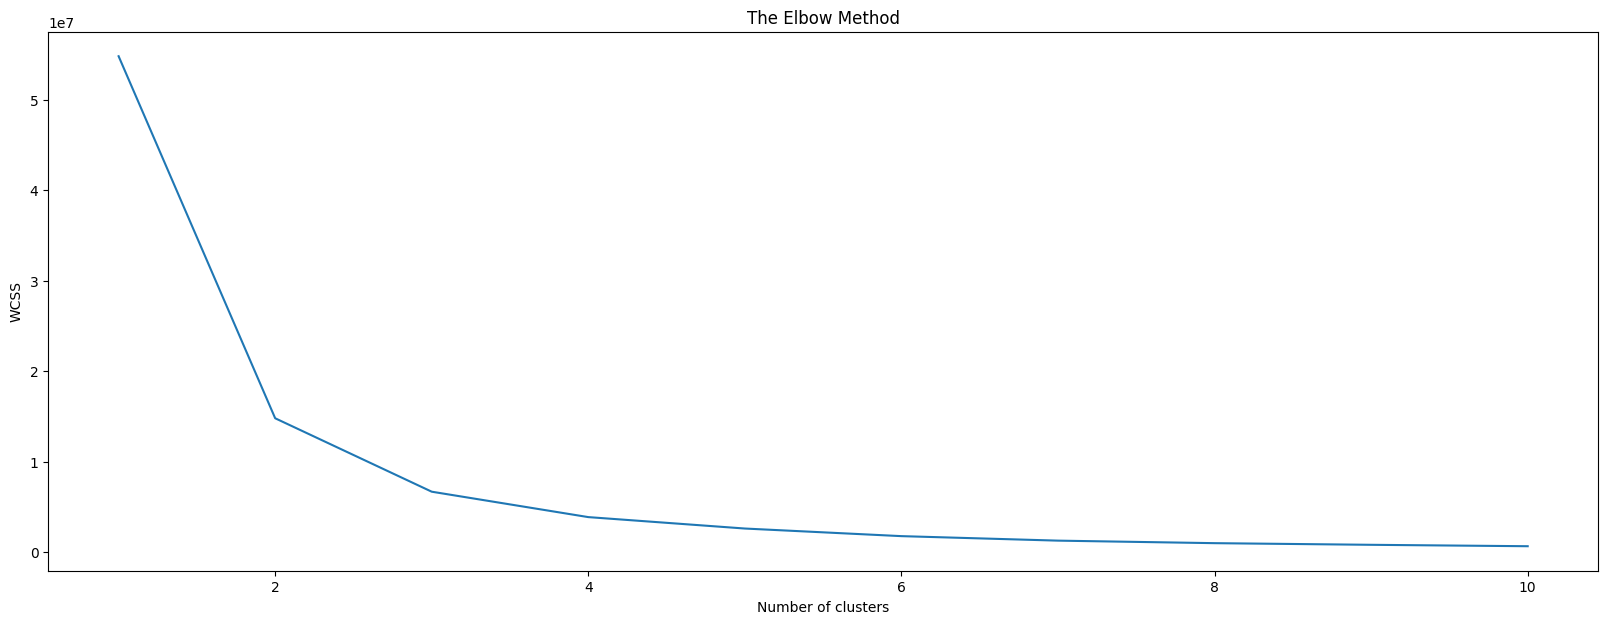

In [252]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(20,7))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [253]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

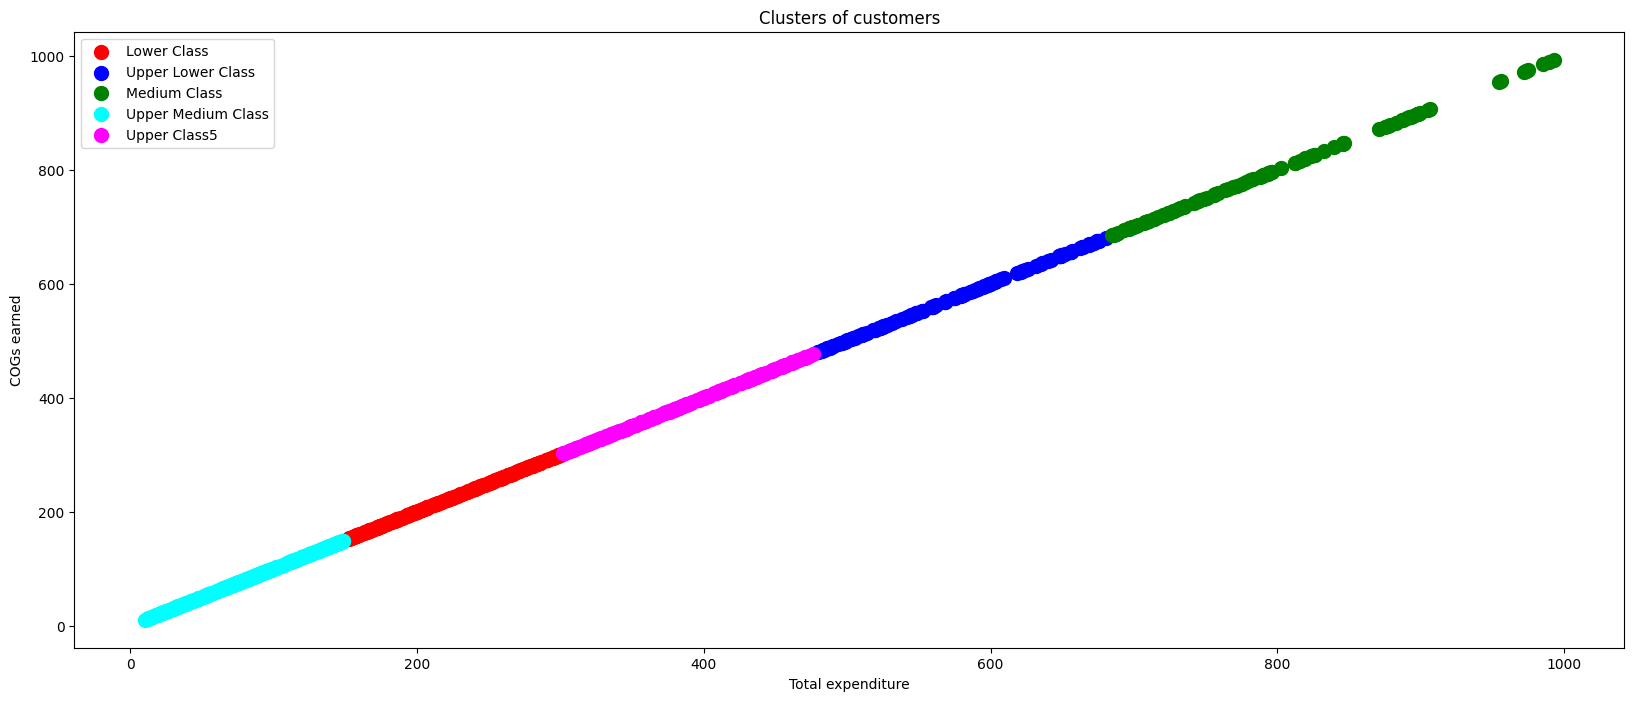

In [254]:
plt.figure(figsize=(20,8))
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0], s = 100, c = 'red', label = 'Lower Class')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1], s = 100, c = 'blue', label = 'Upper Lower Class')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2], s = 100, c = 'green', label = 'Medium Class')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3], s = 100, c = 'cyan', label = 'Upper Medium Class')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4], s = 100, c = 'magenta', label = 'Upper Class5')
plt.title('Clusters of customers')
plt.xlabel('Total expenditure')
plt.ylabel('COGs earned')
plt.legend()
plt.show()